<img src="iris flowers.jpg" style="margin:auto; width:900px; height:420px">

<h1 style="color:#fa01ca; letter-spacing:0.15em; text-align:center">Intern2Grow</h1> 
<h2 style="color:#fa01ca; letter-spacing:0.08em; text-align:center">Iris Flower classification</h2>
<h3 style="color:#fa01ca; letter-spacing:0.15em; text-align:center">yaser Mamdouh</h3>

***

## Import all required packages

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
#from scipy.stats import zscore
import joblib

## loading the dataset

In [3]:
data = pd.read_csv('dataset.csv')

## Data overview

In [4]:
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


- ##### Columns datatype

In [5]:
data.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Class            object
dtype: object

- ##### Rows and Columns

In [6]:
data.shape

(150, 5)

## Iris data processing

- ##### Adjust all column names to lowercase

In [7]:
data_col = data.columns
    
data = data.set_axis(data_col.str.lower(), axis=1)

In [8]:
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


- ##### Check for any missing values

In [9]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

- ##### Check for any duplications

In [10]:
duplicated_indices = data[data.duplicated()]
duplicated_indices

,sepal_length,sepal_width,petal_length,petal_width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


- ##### Remove duplicates

In [11]:
data.drop_duplicates(inplace=True)

- ##### Check that duplicated rows deleted successfully

In [12]:
data.duplicated().sum()

0

- ##### Iris class count

In [13]:
data['class'].value_counts()

class
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

***

***

## Features and target 🎯

In [14]:
y = data['class']
x = data.drop('class', axis=1)

## Exploratory Data Analysis

- #### Summary statistics for Iris Flower Specifics 📈

In [15]:
x.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Count PLot for y

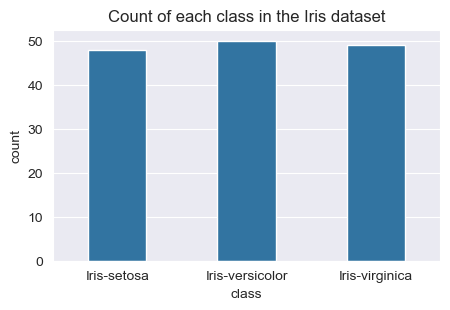

In [16]:
plt.figure(figsize=(5, 3))
sns.set_style('darkgrid')
sns.countplot(x='class', data=data, width=0.45)
plt.xlabel("class")
plt.ylabel("count")
plt.title('Count of each class in the Iris dataset')
plt.show()

- ##### Check distribution for numerical values

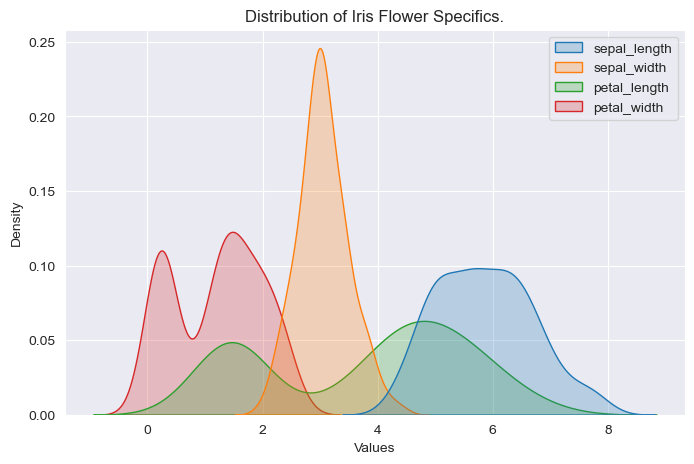

In [17]:
plt.figure(figsize=(8,5))

sns.kdeplot(data=x, fill=True, legend=True)
plt.title("Distribution of Iris Flower Specifics.")
plt.xlabel(f"Values")
plt.ylabel("Density")
plt.grid(True)
plt.savefig("imgs\Distribution of iris flower Specifics.png")
plt.show()

#### Check Outliers 😒🧛‍♂️

In [18]:
# Calculate the Z-score for each numerical feature
z_scores = np.abs((x - x.mean()) / x.std())

# Set the threshold for identifying outliers
threshold = 3

# Create a boolean mask for non-outliers
mask = (z_scores < threshold).all(axis=1)

# Apply the mask to get the DataFrame without outliers
cleaned_data = data[mask]

# Identify the outliers
outliers = data[~mask]

print("Outliers:")
print(outliers)

Outliers:
    sepal_length  sepal_width  petal_length  petal_width        class
15           5.7          4.4           1.5          0.4  Iris-setosa


In [19]:
print("DataFrame without outliers:")
cleaned_data

DataFrame without outliers:


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## splitting data

In [20]:
y = cleaned_data['class']
x = cleaned_data.drop('class', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
print(f"Shape of x_train = {x_train.shape}, and  x_test = {x_test.shape}")
print(f"Shape of y_train = {y_train.shape}, and  y_test = {y_test.shape}")

Shape of x_train = (116, 4), and  x_test = (30, 4)
Shape of y_train = (116,), and  y_test = (30,)


## Baseline models and cross validation to select the top performing models

In [22]:
def get_based_models():
    based_models = []
    
    based_models.append(('LR_L2', LogisticRegression(penalty='l2')))
    
    based_models.append(('LDA', LinearDiscriminantAnalysis()))
    
    based_models.append(('KNN_5', KNeighborsClassifier(n_neighbors=5)))
    based_models.append(('KNN_7', KNeighborsClassifier(n_neighbors=7)))
    based_models.append(('KNN_9', KNeighborsClassifier(n_neighbors=9)))
    based_models.append(('KNN_11', KNeighborsClassifier(n_neighbors=11)))
    
    based_models.append(('DT_gini', DecisionTreeClassifier(criterion='gini')))
    based_models.append(('DT_entropy', DecisionTreeClassifier(criterion='entropy' )))
    
    based_models.append(('NB', GaussianNB()))
    
    based_models.append(('SVM_Linear', SVC(kernel='linear', gamma='auto', probability=True)))
    based_models.append(('SVM_RBF', SVC(kernel='rbf', gamma='auto', probability=True)))
    based_models.append(('SVM_Sigmoid', SVC(kernel='sigmoid', gamma='auto', probability=True)))
    based_models.append(('SVM_Poly', SVC(kernel='poly', gamma='auto', probability=True)))
    
    based_models.append(('AdaBoost', AdaBoostClassifier()))
    
    based_models.append(('GradientBoosting', GradientBoostingClassifier(n_estimators=100, max_features='sqrt')))
    based_models.append(('GradientBoosting', GradientBoostingClassifier(n_estimators=500, max_features='sqrt')))
    
    based_models.append(('RF_Entropy_100', RandomForestClassifier(criterion='entropy', n_estimators=100)))
    based_models.append(('RF_Entropy_500', RandomForestClassifier(criterion='entropy', n_estimators=500)))

    based_models.append(('RF_Gini_100', RandomForestClassifier(criterion='gini', n_estimators=100)))
    based_models.append(('RF_Gini_500', RandomForestClassifier(criterion='gini', n_estimators=500)))

    based_models.append(('ExtraTrees_100', ExtraTreesClassifier(n_estimators=100)))
    based_models.append(('ExtraTrees_500', ExtraTreesClassifier(n_estimators=500)))
    based_models.append(('ExtraTrees_1000', ExtraTreesClassifier(n_estimators=1000)))

    based_models.append(('MLP', MLPClassifier()))
    
    based_models.append(('SGD', SGDClassifier(max_iter=5000, tol=1e-4)))

    
    return based_models

In [23]:
# Define the models
models = get_based_models()

# Evaluate each model using cross-validation
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: Mean Accuracy: {np.mean(cv_results):.4f} (Std Dev: {np.std(cv_results):.4f})')


LR_L2: Mean Accuracy: 0.9572 (Std Dev: 0.0381)
LDA: Mean Accuracy: 0.9743 (Std Dev: 0.0210)
KNN_5: Mean Accuracy: 0.9656 (Std Dev: 0.0506)
KNN_7: Mean Accuracy: 0.9656 (Std Dev: 0.0506)
KNN_9: Mean Accuracy: 0.9659 (Std Dev: 0.0417)
KNN_11: Mean Accuracy: 0.9656 (Std Dev: 0.0324)
DT_gini: Mean Accuracy: 0.9572 (Std Dev: 0.0264)
DT_entropy: Mean Accuracy: 0.9659 (Std Dev: 0.0314)
NB: Mean Accuracy: 0.9572 (Std Dev: 0.0381)
SVM_Linear: Mean Accuracy: 0.9830 (Std Dev: 0.0209)
SVM_RBF: Mean Accuracy: 0.9743 (Std Dev: 0.0346)
SVM_Sigmoid: Mean Accuracy: 0.2500 (Std Dev: 0.0638)
SVM_Poly: Mean Accuracy: 0.9486 (Std Dev: 0.0318)


E:\environment_src\Anaconda_installation\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
E:\environment_src\Anaconda_installation\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
E:\environment_src\Anaconda_installation\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
E:\environment_src\Anaconda_installation\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME alg

AdaBoost: Mean Accuracy: 0.9486 (Std Dev: 0.0318)
GradientBoosting: Mean Accuracy: 0.9486 (Std Dev: 0.0318)
GradientBoosting: Mean Accuracy: 0.9572 (Std Dev: 0.0264)
RF_Entropy_100: Mean Accuracy: 0.9572 (Std Dev: 0.0381)
RF_Entropy_500: Mean Accuracy: 0.9572 (Std Dev: 0.0381)
RF_Gini_100: Mean Accuracy: 0.9572 (Std Dev: 0.0381)
RF_Gini_500: Mean Accuracy: 0.9572 (Std Dev: 0.0381)
ExtraTrees_100: Mean Accuracy: 0.9489 (Std Dev: 0.0490)
ExtraTrees_500: Mean Accuracy: 0.9489 (Std Dev: 0.0490)
ExtraTrees_1000: Mean Accuracy: 0.9489 (Std Dev: 0.0490)


E:\environment_src\Anaconda_installation\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\environment_src\Anaconda_installation\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\environment_src\Anaconda_installation\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP: Mean Accuracy: 0.9743 (Std Dev: 0.0210)
SGD: Mean Accuracy: 0.8355 (Std Dev: 0.1390)


E:\environment_src\Anaconda_installation\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\environment_src\Anaconda_installation\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Building a Model with paramter tuning

> ## best models:
 - ##### LDA: Mean Accuracy: 0.9743 (Std Dev: 0.0210)
 - ##### KNN_9: Mean Accuracy: 0.9659 (Std Dev: 0.0417)
 - ##### SVM_Linear: Mean Accuracy: 0.9830 (Std Dev: 0.0209)
 - ##### SVM_RBF: Mean Accuracy: 0.9743 (Std Dev: 0.0346)

#### Linear Discriminant Analysis:

In [24]:
cl1 = LinearDiscriminantAnalysis()
cl1.fit(x_train, y_train)
y_train_pred = cl1.predict(x_train)
y_test_pred = cl1.predict(x_test)

print(f"accuracy (train set): {accuracy_score(y_train, y_train_pred):.2f} %")
print(f"accuracy (test set): {accuracy_score(y_test, y_test_pred):.2f} %")

#print("classification report (train set):\n", classification_report(y_train, y_train_pred))
#print("classification report (test set):\n", classification_report(y_test, y_test_pred))

accuracy (train set): 0.97 %
accuracy (test set): 1.00 %


#### K-Nearest Neighbors: KNN-9

In [25]:
cl2 = KNeighborsClassifier(n_neighbors=9)
cl2.fit(x_train, y_train)
y_train_pred = cl2.predict(x_train)
y_test_pred = cl2.predict(x_test)

print(f"accuracy (train set): {accuracy_score(y_train, y_train_pred):.2f} %")
print(f"accuracy (test set): {accuracy_score(y_test, y_test_pred):.2f} %")


accuracy (train set): 0.97 %
accuracy (test set): 1.00 %


#### Support Vector Machnie: SVC-linear

In [26]:
cl3 = SVC(kernel='linear')
cl3.fit(x_train, y_train)
y_train_pred = cl3.predict(x_train)
y_test_pred = cl3.predict(x_test)

print(f"accuracy (train set): {accuracy_score(y_train, y_train_pred):.2f} %")
print(f"accuracy (test set): {accuracy_score(y_test, y_test_pred):.2f} %")


accuracy (train set): 0.98 %
accuracy (test set): 1.00 %


#### Support Vector Machnie: SVC-rbf

In [27]:
cl4 = SVC(kernel='poly', C=0.3, random_state=42, class_weight='balanced' )
cl4.fit(x_train, y_train)
y_train_pred = cl4.predict(x_train)
y_test_pred = cl4.predict(x_test)

print(f"accuracy (train set): {accuracy_score(y_train, y_train_pred):.2f} %")
print(f"accuracy (test set): {accuracy_score(y_test, y_test_pred):.2f} %")


accuracy (train set): 0.98 %
accuracy (test set): 0.97 %


#### Hyperparameter Tuning: SVC-RBF using Grid Search

In [28]:
cl5 = SVC(random_state=42, gamma='auto')
grid_parameters = {
    'kernel': ['poly', 'rbf', 'linear', 'sigmoid'],
    'C': [0.1, 0.2, 0.3, 0.5, 0.7],
}

grid_search = GridSearchCV(estimator=cl5, param_grid=grid_parameters, cv=5, scoring='f1_micro',  n_jobs=1,)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(gamma='auto', random_state=42), n_jobs=1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.5, 0.7],
                         'kernel': ['poly', 'rbf', 'linear', 'sigmoid']},
             scoring='f1_micro')

In [29]:
# Retrieve the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_svc = grid_search.best_estimator_
y_train_pred = best_svc.predict(x_train)
y_test_pred = best_svc.predict(x_test)

# Evaluate the model
print(f"accuracy (train set): {accuracy_score(y_train, y_train_pred):.2f} %")
print(f"accuracy (test set): {accuracy_score(y_test, y_test_pred):.2f} %")

#print(classification_report(y_test, y_test_pred))

Best parameters found:  {'C': 0.7, 'kernel': 'linear'}
accuracy (train set): 0.98 %
accuracy (test set): 1.00 %


#### Best Model Evaluation: cl4

In [30]:
cl4 = SVC(kernel='poly', C=0.3, random_state=42, class_weight='balanced' )
cl4.fit(x_train, y_train)
y_train_pred = cl4.predict(x_train)
y_test_pred = cl4.predict(x_test)

print(f"accuracy (train set): {accuracy_score(y_train, y_train_pred):.2f} %")
print(f"accuracy (test set): {accuracy_score(y_test, y_test_pred):.2f} %")
print()
print(f"recall (train set): {recall_score(y_train, y_train_pred, average='micro'):.2f} %")
print(f"recall (test set): {recall_score(y_test, y_test_pred, average='micro'):.2f} %")
print()
print(f"f1-score (train set): {f1_score(y_train, y_train_pred, average='macro'):.2f} %")
print(f"f1-score (test set): {f1_score(y_test, y_test_pred, average='macro'):.2f} %")
print()
print(f"precision (train set): {precision_score(y_train, y_train_pred, average='weighted'):.2f} %")
print(f"precision (test set): {precision_score(y_test, y_test_pred, average='weighted'):.2f} %")

accuracy (train set): 0.98 %
accuracy (test set): 0.97 %

recall (train set): 0.98 %
recall (test set): 0.97 %

f1-score (train set): 0.98 %
f1-score (test set): 0.97 %

precision (train set): 0.98 %
precision (test set): 0.97 %


> **Confusion Matrix**

train set: Confusion Matrix:
 [[37  0  0]
 [ 0 38  2]
 [ 0  0 39]]
test set: Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]



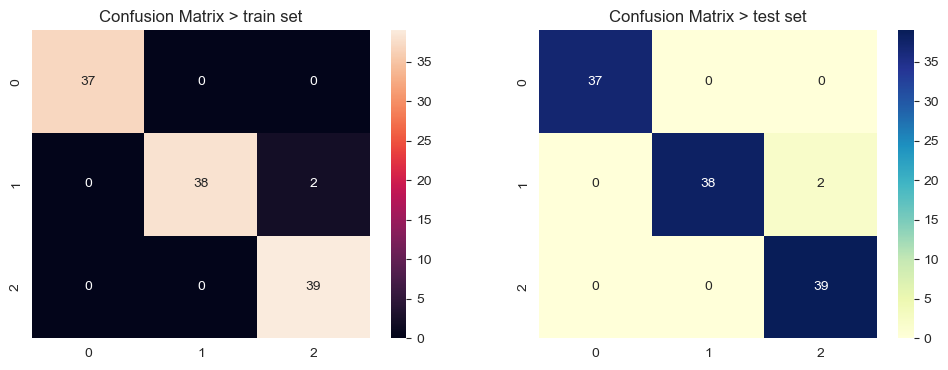

In [31]:
f, (ax_1, ax_2) = plt.subplots(1, 2)
f.set_size_inches(12, 4)
cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', ax=ax_1,)
ax_1.set(title="Confusion Matrix > train set")


cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_train, annot=True, fmt='d', ax=ax_2, cmap='YlGnBu')
ax_2.set(title="Confusion Matrix > test set")

print("train set: Confusion Matrix:\n", cm_train)
print("test set: Confusion Matrix:\n", cm_test)
print()
plt.show()

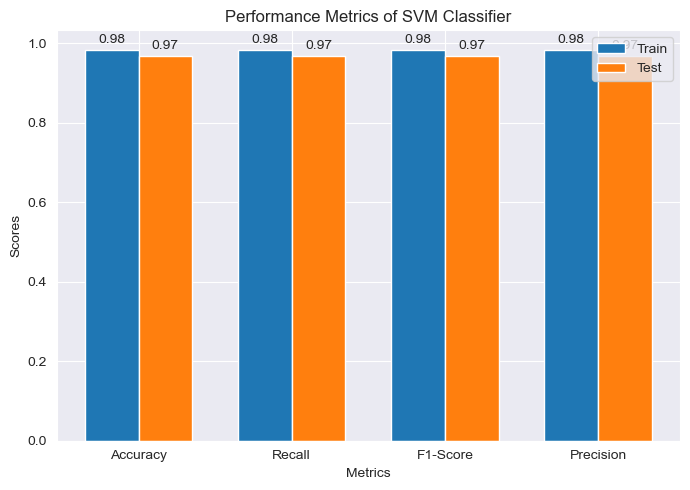

In [32]:

metrics = {
    "Accuracy": [accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)],
    "Recall": [recall_score(y_train, y_train_pred, average='micro'), recall_score(y_test, y_test_pred, average='micro')],
    "F1-Score": [f1_score(y_train, y_train_pred, average='micro'), f1_score(y_test, y_test_pred, average='micro')],
    "Precision": [precision_score(y_train, y_train_pred, average='micro'), precision_score(y_test, y_test_pred, average='micro')]
}

# Create a bar chart
labels = list(metrics.keys())
train_values = [metrics[label][0] for label in labels]
test_values = [metrics[label][1] for label in labels]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
rects1 = ax.bar(x - width/2, train_values, width, label='Train')
rects2 = ax.bar(x + width/2, test_values, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics of SVM Classifier')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig("imgs/best model performace metrics.png")
plt.show()


#### Saving the Model

In [33]:
joblib.dump(cl4, 'files\iris_classifier_svc_poly.pkl')

['files\\iris_classifier_svc_poly.pkl']

### Model Deployment

In [34]:
#### Get the iris flower specifics (features)
def get_features():
    try:
        sepal_length = float(input("The Iris Sepal length: "))
        while sepal_length == "":
            print("please enter a valid number (1.5, 3, 4.02, etc.):")
            sepal_length = float(input("The Iris Sepal length: "))
            
        sepal_width = float(input("The Iris Sepal width: "))
        while sepal_width == "":
            print("please enter a valid number (1.5, 3, 4.02, etc.):")
            sepal_width = float(input("The Iris Sepal width: "))
            
        petal_length = float(input("The Iris Petal length: "))
        while petal_length == "":
            print("please enter a valid number (1.5, 3, 4.02, etc.):")
            petal_length = float(input("The Iris Petal length: "))
        
        petal_width = float(input("The Iris Petal width: "))
        while petal_width == "":
            print("please enter a valid number (1.5, 3, 4.02, etc.):")
            petal_width = float(input("The Iris Petal width: "))
    except ValueError as ve:
        print("invalid input:", ve)
    
    iris_features = {
        'sepal_length': sepal_length,
        'sepal_width': sepal_width,
        'petal_length': petal_length,
        'petal_width': petal_width,
    }
    val_df = pd.DataFrame( [iris_features], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
    return val_df

iris_df = get_features()

# Import saved model
model = joblib.load("files\iris_classifier_svc_poly.pkl")

# predict using the new features
prediction = model.predict(iris_df)
print(f"It's {prediction[0]}.")

The Iris Sepal length:  3
The Iris Sepal width:  2.6
The Iris Petal length:  1.2
The Iris Petal width:  3.5


It's Iris-setosa.


<h1 style="width:80%; height:55px; margin:auto; font-family:Segoe Script; font-weight:bold; font-size:40px; border:5px dotted orange; text-align:center; background-color:black; color:orange; letter-spacing:0.3em; padding:30px 0 10px 0">Thanks</h1>

In [35]:
# 4.9  3.1  1.5	 0.1	Iris-setosa
# 5.8  2.7	5.1	 1.9	Iris-virginica